# FIT5202 2024 S2 Assignment 1 : Analysing Fraudulent Transaction Data

## Table of Contents
* [Part 1 : Working with RDD](#part-1)  
    - [1.1 Data Preparation and Loading](#1.1)  
    - [1.2 Data Partitioning in RDD](#1.2)  
    - [1.3 Query/Analysis](#1.3)  
* [Part 2 : Working with DataFrames](#2-dataframes)  
    - [2.1 Data Preparation and Loading](#2-dataframes)  
    - [2.2 Query/Analysis](#2.2)  
* [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)  

# Part 1 : Working with RDDs (30%) <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries. 

1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with 4 cores on your machine. 

In [1]:
# Import SparkConf class into the program
from pyspark import SparkConf

master = "local[4]"

app_name = "Assignment_1"
spark_conf = SparkConf().setMaster(master).setAppName(app_name).set("spark.sql.session.timeZone", "Australia/Melbourne")

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')



1.1.2 Load csv files into multiple RDDs.

In [2]:
import os
curr_dir = os.getcwd()

In [3]:
# Load each CSV file into an RDD

# Load category.csv
category_data_rdd = sc.textFile(curr_dir + "/category.csv")
print("Category RDD:")
print(category_data_rdd.take(5))

# Load customers.csv
customers_data_rdd = sc.textFile(curr_dir + "/customers.csv")
print("\nCustomers RDD:")
print(customers_data_rdd.take(5))

# Load geolocation.csv
geolocation_data_rdd = sc.textFile(curr_dir + "/geolocation.csv")
print("\nGeolocation RDD:")
print(geolocation_data_rdd.take(5))

# Load merchant.csv
merchant_data_rdd = sc.textFile(curr_dir + "/merchant.csv")
print("\nMerchant RDD:")
print(merchant_data_rdd.take(5))

# Load transactions.csv
transactions_data_rdd = sc.textFile(curr_dir + "/transactions.csv")
print("\nTransactions RDD:")
print(transactions_data_rdd.take(5))


Category RDD:
['"category","id_category"', 'Entertainment,1', 'Food_Dining,2', 'Gas_Transport,3', 'Grocery(Online),4']

Customers RDD:
['"id_customer","cc_num","firstname","lastname","gender","address","job","dob","acct_num","id_geolocation"', '"263-99-6044","4241904966319315",Melissa,Turner,F,"058 Stanley Cliff",Risk manager,"2005-05-30",376443331852,6339', '"292-61-7844","30520471167198",Mark,Brown,M,"413 Angela Mall",Trading standards officer,"2003-04-19",870143739098,6200', '"491-28-3311","180084219933088",Courtney,Hall,F,"5712 Tamara Estate",Optometrist,"2002-04-17",965855026307,3547', '"826-23-1754","2623398454615676",Krystal,Branch,F,"1016 Bennett Mountains",Banker,"2001-07-15",11324746755,6302']

Geolocation RDD:
['"city","state","zip","lat","long","id_geolocation","population"', 'Burkeville,TX,75932,31.0099,-93.6585,1,1437', 'Fresno,TX,77545,29.5293,-95.4626,2,19431', 'Osseo,MN,55311,45.1243,-93.4996,3,65312', 'Pomona,CA,91766,34.0418,-117.7569,4,154204']

Merchant RDD:
['"mer

1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [4]:
import csv
from io import StringIO


##def remove_header_and_parse(rdd):
##    header = rdd.first()  # extract the header
##    return rdd.filter(lambda row: row != header) \
#              .map(lambda row: ",".join(list(csv.reader(StringIO(row), delimiter=','))[0]))


# Updated function to keep rows as lists of fields
def header_omit(rdd):
    header = rdd.first()  # extract the header
    return rdd.filter(lambda row: row != header) \
              .map(lambda row: list(csv.reader(StringIO(row), delimiter=','))[0])
# Process category data RDD
category_data_rdd = header_omit(category_data_rdd)
print("Category RDD Count:", category_data_rdd.count())
print("Category 10 Records:", category_data_rdd.take(10))

# Process customers data RDD
customers_data_rdd = header_omit(customers_data_rdd)
print("\nCustomers RDD Count:", customers_data_rdd.count())
print("Customers 10 Records:", customers_data_rdd.take(10))

# Process geolocation data RDD
geolocation_data_rdd = header_omit(geolocation_data_rdd)
print("\nGeolocation RDD Count:", geolocation_data_rdd.count())
print("Geolocation 10 Records:", geolocation_data_rdd.take(10))

# Process merchant data RDD
merchant_data_rdd = header_omit(merchant_data_rdd)
print("\nMerchant RDD Count:", merchant_data_rdd.count())
print("Merchant 10 Records:", merchant_data_rdd.take(10))

# Process transactions data RDD
transactions_data_rdd = header_omit(transactions_data_rdd)
print("\nTransactions RDD Count:", transactions_data_rdd.count())
print("Transactions 10 Records:", transactions_data_rdd.take(10))


Category RDD Count: 14
Category 10 Records: [['Entertainment', '1'], ['Food_Dining', '2'], ['Gas_Transport', '3'], ['Grocery(Online)', '4'], ['Grocery(In Store)', '5'], ['Health_Fitness', '6'], ['Home', '7'], ['Pets', '8'], ['Misc(Online)\\', '9'], ['Misc(In Store)', '10']]

Customers RDD Count: 10000
Customers 10 Records: [['263-99-6044', '4241904966319315', 'Melissa', 'Turner', 'F', '058 Stanley Cliff', 'Risk manager', '2005-05-30', '376443331852', '6339'], ['292-61-7844', '30520471167198', 'Mark', 'Brown', 'M', '413 Angela Mall', 'Trading standards officer', '2003-04-19', '870143739098', '6200'], ['491-28-3311', '180084219933088', 'Courtney', 'Hall', 'F', '5712 Tamara Estate', 'Optometrist', '2002-04-17', '965855026307', '3547'], ['826-23-1754', '2623398454615676', 'Krystal', 'Branch', 'F', '1016 Bennett Mountains', 'Banker', '2001-07-15', '11324746755', '6302'], ['172-11-9264', '639034043849', 'Carol', 'Ellis', 'F', '819 Joseph Plains Suite 807', 'Sports coach', '2003-11-21', '1134

1.1.4 Drop personal information columns from RDDs: cc_num, firstname, lastname, address. 

In [5]:
# Assuming customers_data_rdd is already an RDD of lists (not strings)
# No need to split rows as it's already done

# Function to remove personal details from each row in the customers RDD
def private_info_removal(row):    
    return [row[0]] + [row[4]] + row[6:]

# Apply the function to the customers RDD to clean it up
cleaned_customers_rdd = customers_data_rdd.map(private_info_removal)

# Show how many records are in the cleaned RDD and the first 10 entries
print("Total Records", cleaned_customers_rdd.count())
print("First 10 Entries ", cleaned_customers_rdd.take(10))


Total Records 10000
First 10 Entries  [['263-99-6044', 'F', 'Risk manager', '2005-05-30', '376443331852', '6339'], ['292-61-7844', 'M', 'Trading standards officer', '2003-04-19', '870143739098', '6200'], ['491-28-3311', 'F', 'Optometrist', '2002-04-17', '965855026307', '3547'], ['826-23-1754', 'F', 'Banker', '2001-07-15', '11324746755', '6302'], ['172-11-9264', 'F', 'Sports coach', '2003-11-21', '113495175185', '5227'], ['150-95-7922', 'F', 'Medical secretary', '2006-03-06', '719783599768', '4047'], ['841-99-2980', 'M', 'Toxicologist', '2005-07-01', '908554315130', '6271'], ['705-41-6699', 'F', 'Product manager', '2003-01-23', '772162574642', '6302'], ['016-22-4524', 'F', 'Loss adjuster, chartered', '2001-08-26', '982712248618', '5614'], ['639-46-2126', 'F', 'Hydrologist', '2005-02-10', '603471636817', '6328']]


### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition.

In [6]:
# Function to display how many partitions an RDD has and the number of records in each one
def partition_details(actual_rdd, name_rdd):
    num = actual_rdd.getNumPartitions()
    print(f"\n{name_rdd} - No of Partitions: {num}")
       
    partition_sizes = actual_rdd.glom().map(len).collect()
    for i, size in enumerate(partition_sizes):
        print(f"Partition {i}ac: {size} records")

        
partition_details(cleaned_customers_rdd, "Customers RDD")
partition_details(category_data_rdd, "Category RDD")
partition_details(geolocation_data_rdd, "Geolocation RDD")
partition_details(merchant_data_rdd, "Merchant RDD")
partition_details(transactions_data_rdd, "Transactions RDD")



Customers RDD - No of Partitions: 2
Partition 0ac: 5002 records
Partition 1ac: 4998 records

Category RDD - No of Partitions: 2
Partition 0ac: 6 records
Partition 1ac: 8 records

Geolocation RDD - No of Partitions: 2
Partition 0ac: 3178 records
Partition 1ac: 3164 records

Merchant RDD - No of Partitions: 4
Partition 0ac: 1094930 records
Partition 1ac: 1059961 records
Partition 2ac: 1059729 records
Partition 3ac: 622411 records

Transactions RDD - No of Partitions: 56
Partition 0ac: 409654 records
Partition 1ac: 409552 records
Partition 2ac: 409551 records
Partition 3ac: 409568 records
Partition 4ac: 409556 records
Partition 5ac: 409615 records
Partition 6ac: 409623 records
Partition 7ac: 409562 records
Partition 8ac: 409556 records
Partition 9ac: 409568 records
Partition 10ac: 409558 records
Partition 11ac: 409590 records
Partition 12ac: 409620 records
Partition 13ac: 409626 records
Partition 14ac: 409575 records
Partition 15ac: 409576 records
Partition 16ac: 409570 records
Partition

1.2.2 Answer the following questions:   
a) How many partitions do the above RDDs have?   
b) How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it is partitioned in this number?   
c) Assuming we are querying the dataset based on transaction date, can you think of a better strategy to partition the data based on your available hardware resources?

Your answer for a

<ol>
<li> Customers data rdd : 2 partitions</li>
<li>Category data rdd: 2 partitions</li>
<li>Geolocation data rdd: 2 partitions</li>
<li>Merchant data rdd: 4 partitions</li>
<li>Transactions data rdd: 56 partitions</li>
</ol>

Your answer for b

So the initial spark partitions data is based upon the systenm's file system's block size. 
More factors are: 

<ol>
    <li> As the larger the dataset, it will be divided into more partitions.</li>
    <li> It also depends upon the cluster's CPU cores.</li>
</ol>

Like how we have the transaction data, and as it is a big dataset it is divided into 56 partitions.

Your answer for c 

If the queries are based on the transaction data it might be more intelligent to partition the data by the transaction date.
Like if the data is across multiple years, we can partition based on the month, week or years.

1.2.3 Create a user defined function (UDF) to transform trans_timestamp to ISO format(YYYY-MM-DD hh:mm:ss), then call the UDF and add a new column trans_datetime.

In [7]:
# Let's check out the first 5 records before we do any transformation
print("Before Transformation:")
print(transactions_data_rdd.take(5))


Before Transformation:
[['0c20530e90719213c442744161a1850b', '1622367050', '87.18', '0', '794-45-4364', '46', '2641132', '12'], ['984fc48fc946605deefc9d0967582811', '1609183538', '276.97', '0', '436-80-2340', '60', '2932280', '5'], ['b13ff47c73689bc4c8320c0ce403b15d', '1655595319', '7.67', '0', '385-77-6544', '87', '2708770', '2'], ['7cffae35cab67d9415f9f22d91ca7acc', '1613234460', '198.96', '0', '450-56-1117', '138', '1170872', '10'], ['22e01cb3403a4c7ce598ebe785e1e947', '1605030979', '33.46', '0', '397-54-0253', '218', '2470519', '5']]


In [8]:
from datetime import datetime

def time_iso_change(row):
    trans_timestamp = int(row[1])  
    trans_datetime = datetime.utcfromtimestamp(trans_timestamp).strftime('%Y-%m-%d %H:%M:%S')
    return row + [trans_datetime]

transactions_with_datetime_rdd = transactions_data_rdd.map(time_iso_change)
print("\nAfter Transformation:")
print(transactions_with_datetime_rdd.take(5))



After Transformation:
[['0c20530e90719213c442744161a1850b', '1622367050', '87.18', '0', '794-45-4364', '46', '2641132', '12', '2021-05-30 09:30:50'], ['984fc48fc946605deefc9d0967582811', '1609183538', '276.97', '0', '436-80-2340', '60', '2932280', '5', '2020-12-28 19:25:38'], ['b13ff47c73689bc4c8320c0ce403b15d', '1655595319', '7.67', '0', '385-77-6544', '87', '2708770', '2', '2022-06-18 23:35:19'], ['7cffae35cab67d9415f9f22d91ca7acc', '1613234460', '198.96', '0', '450-56-1117', '138', '1170872', '10', '2021-02-13 16:41:00'], ['22e01cb3403a4c7ce598ebe785e1e947', '1605030979', '33.46', '0', '397-54-0253', '218', '2470519', '5', '2020-11-10 17:56:19']]


### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

1.3.1 Calculate the summary of fraudulent transactions amount for each year, each month. Print the results in tabular format.

In [9]:
from collections import defaultdict

fraud_trans = transactions_with_datetime_rdd.filter(lambda row: row[3] == '1')
year_month_amount_rdd = fraud_trans.map(lambda row: (row[-1][:7],float(row[2])))
summary_rdd = year_month_amount_rdd.reduceByKey(lambda a, b: a + b)
sorted_summary = summary_rdd.sortByKey().collect()

print("Year-Month\tTotal Fraudulent Amount")
print("----------------------------------")
for year_month, total_amount in sorted_summary:
    print(f"{year_month}\t{total_amount:.2f}")


Year-Month	Total Fraudulent Amount
----------------------------------
2020-01	898993.87
2020-02	1055068.69
2020-03	864818.53
2020-04	797646.98
2020-05	925864.70
2020-06	983224.85
2020-07	904102.03
2020-08	1031171.33
2020-09	895572.70
2020-10	917590.31
2020-11	876092.53
2020-12	1047136.05
2021-01	925229.73
2021-02	789827.07
2021-03	892832.58
2021-04	907938.06
2021-05	967478.79
2021-06	883641.08
2021-07	997994.13
2021-08	935016.09
2021-09	868437.49
2021-10	1008533.07
2021-11	789345.70
2021-12	799928.90
2022-01	897735.25
2022-02	871017.78
2022-03	1001807.60
2022-04	882859.25
2022-05	929544.45
2022-06	995504.95
2022-07	962204.05
2022-08	965271.53
2022-09	931044.91
2022-10	946128.94
2022-11	996390.87
2022-12	976878.63


1.3.2 List 20 mechants that suffered the most from fraudulent activities(i.e. 20 highest amount of monetary loss).

In [10]:
fraud_transactions_rdd = transactions_with_datetime_rdd.filter(lambda row: row[3] == '1')
rdd_merchant_amount = fraud_transactions_rdd.map(lambda row: (row[6],float(row[2]) ))

rdd_merchant_loss = rdd_merchant_amount.reduceByKey(lambda a, b: a + b)
merchant_20 = rdd_merchant_loss.takeOrdered(20, key=lambda x: -x[1])
print("Merchant ID\tTotal Fraudulent Loss")
print("----------------------------------")
for id, loss_total in merchant_20:
    print(f"{id}\t{loss_total:.2f}")


Merchant ID	Total Fraudulent Loss
----------------------------------
583697	4140.42
1260698	3350.73
723944	3152.61
907976	3116.01
1237992	3058.52
1120003	3022.88
3612453	2990.54
3027129	2980.86
3566147	2903.51
1731014	2779.67
2128631	2729.68
3205157	2706.85
727880	2685.65
2736950	2512.22
2493145	2456.32
3481436	2329.59
1978671	2308.45
3789531	2278.31
1500256	2277.79
3543403	2274.36


## Part 2. Working with DataFrames (45%) <a class="anchor" name="2-dataframes"></a>
In this section, you need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

2.1.1. Load the CSV files into separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each column.

In [11]:
from pyspark.sql.types import *

category_schema = StructType([
    StructField("category", StringType(), True),
    StructField("id_category", IntegerType(), True)
])

customers_schema = StructType([
    StructField("id_customer", StringType(), True),
    StructField("cc_num", StringType(), True),
    StructField("firstname", StringType(), True),
    StructField("lastname", StringType(), True),
    StructField("gender", StringType(), True),
    StructField("address", StringType(), True),
    StructField("job", StringType(), True),
    StructField("dob", DateType(), True),  # Date of birth
    StructField("acct_num", StringType(), True),
    StructField("id_geolocation", IntegerType(), True)
])

geolocation_schema = StructType([
    StructField("city", StringType(), True),
    StructField("state", StringType(), True),
    StructField("zip", StringType(), True),
    StructField("lat", FloatType(), True),  # Latitude
    StructField("long", FloatType(), True),  # Longitude
    StructField("id_geolocation", IntegerType(), True),
    StructField("population", IntegerType(), True)
])

merchant_schema = StructType([
    StructField("merchant", StringType(), True),
    StructField("id_geolocation", IntegerType(), True),
    StructField("id_merchant", IntegerType(), True)
])

transactions_schema = StructType([
    StructField("id_transaction", StringType(), True),
    StructField("trans_timestamp", LongType(), True),  # Transaction timestamp
    StructField("amt", FloatType(), True),  # Transaction amount
    StructField("is_fraud", IntegerType(), True),  # Fraud flag
    StructField("id_customer", StringType(), True),
    StructField("id_geolocation", IntegerType(), True),
    StructField("id_merchant", IntegerType(), True),
    StructField("id_category", IntegerType(), True)
])

category_df = spark.read.csv("category.csv", header=True, schema=category_schema)
customers_df = spark.read.csv("customers.csv", header=True, schema=customers_schema)
geolocation_df = spark.read.csv("geolocation.csv", header=True, schema=geolocation_schema)
merchant_df = spark.read.csv("merchant.csv", header=True, schema=merchant_schema)
transactions_df = spark.read.csv("transactions.csv", header=True, schema=transactions_schema)


2.1.2 Display the schema of the dataframes.

In [12]:

print("Category df Schema and data")
category_df.printSchema()
category_df.show(5)

print("Customers df Schema and data")
customers_df.printSchema()
customers_df.show(5)

print("Geolocation df Schema and data")
geolocation_df.printSchema()
geolocation_df.show(5)

print("Merchant df Schema and data")
merchant_df.printSchema()
merchant_df.show(5)

print("Transactions df Schema and data")
transactions_df.printSchema()
transactions_df.show(5)


Category df Schema and data
root
 |-- category: string (nullable = true)
 |-- id_category: integer (nullable = true)

+-----------------+-----------+
|         category|id_category|
+-----------------+-----------+
|    Entertainment|          1|
|      Food_Dining|          2|
|    Gas_Transport|          3|
|  Grocery(Online)|          4|
|Grocery(In Store)|          5|
+-----------------+-----------+
only showing top 5 rows

Customers df Schema and data
root
 |-- id_customer: string (nullable = true)
 |-- cc_num: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- address: string (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- acct_num: string (nullable = true)
 |-- id_geolocation: integer (nullable = true)

+-----------+----------------+---------+--------+------+--------------------+--------------------+----------+------------+--------------+
|i

Think about: When the dataset is large, do you need all columns? How to optimize memory usage? Do you need a customized data partitioning strategy? (note: You don’t need to answer these questions.)

### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

2.2.1. Transform the “trans_timestamp” to multiple columns: trans_year, trans_month, trans_day, trans_hour(24-hour format). (note: you can reuse your UDF from part 1 or create a new one.)

In [13]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType
from datetime import datetime

def retrive_year(timestamp):
    return datetime.utcfromtimestamp(timestamp).year

def retrive_month(timestamp):
    return datetime.utcfromtimestamp(timestamp).month

def retrive_day(timestamp):
    return datetime.utcfromtimestamp(timestamp).day

def retrive_hour(timestamp):
    return datetime.utcfromtimestamp(timestamp).hour

retrive_year_udf = udf(retrive_year, IntegerType())
retrive_month_udf = udf(retrive_month, IntegerType())
retrive_day_udf = udf(retrive_day, IntegerType())
retrive_hour_udf = udf(retrive_hour, IntegerType())

transactions_df = transactions_df.withColumn("trans_year", retrive_year_udf(col("trans_timestamp")))
transactions_df = transactions_df.withColumn("trans_month", retrive_month_udf(col("trans_timestamp")))
transactions_df = transactions_df.withColumn("trans_day", retrive_day_udf(col("trans_timestamp")))
transactions_df = transactions_df.withColumn("trans_hour", retrive_hour_udf(col("trans_timestamp")))
transactions_df.select("trans_timestamp", "trans_year", "trans_month", "trans_day", "trans_hour").show(10)


+---------------+----------+-----------+---------+----------+
|trans_timestamp|trans_year|trans_month|trans_day|trans_hour|
+---------------+----------+-----------+---------+----------+
|     1622367050|      2021|          5|       30|         9|
|     1609183538|      2020|         12|       28|        19|
|     1655595319|      2022|          6|       18|        23|
|     1613234460|      2021|          2|       13|        16|
|     1605030979|      2020|         11|       10|        17|
|     1608989049|      2020|         12|       26|        13|
|     1650997797|      2022|          4|       26|        18|
|     1649986601|      2022|          4|       15|         1|
|     1617032215|      2021|          3|       29|        15|
|     1609250028|      2020|         12|       29|        13|
+---------------+----------+-----------+---------+----------+
only showing top 10 rows



2.2.2. Calculate the total amount of fraudulent transactions for each hour. Show the result in a table and plot a bar chart.

+----------+--------------------+
|trans_hour|  total_fraud_amount|
+----------+--------------------+
|        12|1.0214150010820627E7|
|        22|  137877.71991205215|
|         1|  285385.16038417816|
|        13|   5993048.910576105|
|        16|  1886629.1705651283|
|         6|   413311.3295273781|
|         3|    397672.719974041|
|        20|  142994.57007932663|
|         5|  450482.31038475037|
|        19|  151641.65018701553|
|        15|  1911326.1711268425|
|        17|   1078952.700726986|
|         9|   419839.5187177658|
|         4|  382781.02039432526|
|         8|   446479.6103153229|
|        23|   148233.8103609085|
|         7|  429365.83932828903|
|        10|   409774.7102570534|
|        21|  148930.08997154236|
|        11|   5311654.560580254|
+----------+--------------------+
only showing top 20 rows



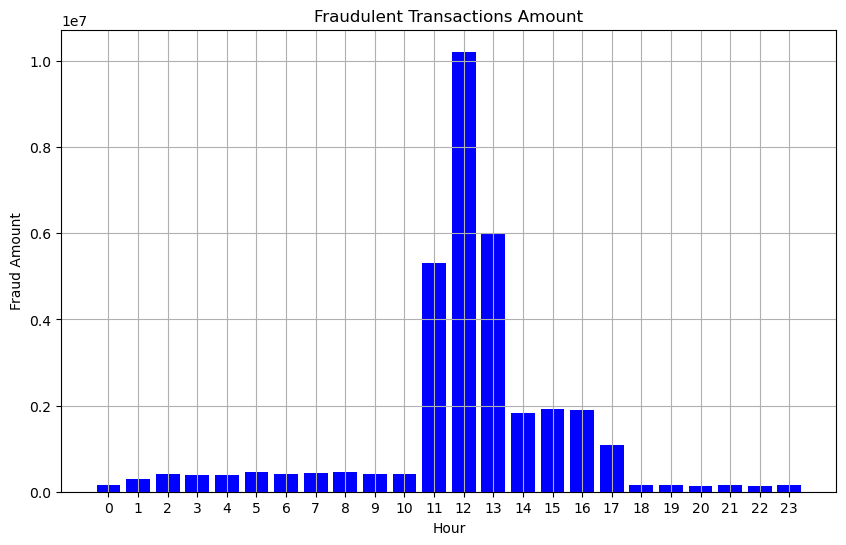

In [14]:
from pyspark.sql.functions import sum as _sum, col
import matplotlib.pyplot as plt

dataframe_fraud = transactions_df.filter(col("is_fraud") == 1)
fraud_amount_df = dataframe_fraud.groupBy("trans_hour").agg(
    _sum("amt").alias("total_fraud_amount")
)
fraud_amount_df.show()
fraud_amount_df = fraud_amount_df.orderBy("trans_hour").toPandas()

plt.figure(figsize=(10, 6))
plt.bar(fraud_amount_df["trans_hour"], fraud_amount_df["total_fraud_amount"], color='blue')
plt.xlabel("Hour")
plt.ylabel("Fraud Amount")
plt.title("Fraudulent Transactions Amount")
plt.xticks(range(0, 24)) 
plt.grid(True)
plt.show()


2.2.3 Print number of small transactions(<=$100) from female who was born after 1990. 

In [15]:
filtered_customers_df = customers_df.filter(
    (col("gender") == "F") & (col("dob") > "1990-12-31")
)
filtered_trans_df = transactions_df.join(
    filtered_customers_df,
    on="id_customer"
)
small_trans_df = filtered_trans_df.filter(col("amt") <= 100)
small_trans_count = small_trans_df.count()
print(f"Number of small transactions {small_trans_count}")


Number of small transactions 1889691


2.2.4 We consider a fraud-to-sales(F2S) ratio of 3% as a benchmark. If a merchant has F2S >= 3%, it is considered operating at very high rick. How many companies are operating at very high risk? (note: The answer should be a single number.)

In [19]:
from pyspark.sql.functions import col, sum as _sum, expr
total_sales = transactions_df.groupBy("id_merchant").agg(
    _sum("amt").alias("total_sales")
)
fraud_df = transactions_df.filter(col("is_fraud") == 1).groupBy("id_merchant").agg(
    _sum("amt").alias("fraud_sales")
)
f2s_ratio_df = fraud_df.join(total_sales, on="id_merchant").withColumn(
    "f2s_ratio", (col("fraud_sales") / col("total_sales")) * 100
)

risk_merchants = f2s_ratio_df.filter(col("f2s_ratio") >= 3)
high_risk_merchants_count = risk_merchants.count()
print(f"Number of merchants operating at very high risk (F2S >= 3%): {high_risk_merchants_count}")

Number of merchants operating at very high risk (F2S >= 3%): 54811


2.2.5 “Abbott and Adam Group” wants to know their total revenue(sum of non-fraud amt) in each state they operate, show the top 20 results by revenue in descending order. You output should include merchant name, state and total revenue. (note: Abbott and Adam group include all merchants who name start with “Abbott” or “Adam”.)

In [20]:
from pyspark.sql.functions import col, sum as _sum
abbott_adam_df = merchant_df.filter(
    col("merchant").startswith("Abbott") | col("merchant").startswith("Adam")
)

trans_merged_df = transactions_df.join(
    abbott_adam_df, on="id_merchant"
).join(
    geolocation_df, on="id_geolocation"
)

non_fraud_trans = trans_merged_df.filter(col("is_fraud") == 0)
revenue_df = non_fraud_trans.groupBy(
    "merchant", "state"
).agg(
    _sum("amt").alias("total_revenue")
)
revenue_df_20 = revenue_df.orderBy(col("total_revenue").desc()).limit(20)
revenue_df_20.show(truncate=False)

+--------------------------+-----+------------------+
|merchant                  |state|total_revenue     |
+--------------------------+-----+------------------+
|Abbott-Rogahn             |CA   |352865.9697378874 |
|Adams, Kovacek and Kuhlman|CA   |279898.7897530794 |
|Adams-Barrows             |CA   |278485.79005908966|
|Abbott-Rogahn             |TX   |247959.90971922874|
|Adams-Barrows             |TX   |199538.57018435   |
|Adams, Kovacek and Kuhlman|TX   |187685.3698939085 |
|Abbott-Rogahn             |NY   |182627.70976650715|
|Abbott-Rogahn             |FL   |178579.29026520252|
|Adams, Kovacek and Kuhlman|NY   |155427.12010335922|
|Adams-Barrows             |FL   |154059.63974308968|
|Adams, Kovacek and Kuhlman|FL   |150222.3498879671 |
|Adams-Barrows             |NY   |145255.89991986752|
|Abbott-Rogahn             |IL   |119764.71997475624|
|Abbott-Rogahn             |PA   |118146.56015014648|
|Abbott-Rogahn             |OH   |105306.52020084858|
|Adams, Kovacek and Kuhlman|

2.2.6 For each year (2020-2022), aggregate the number(count) of fraudulent transactions every hour. Plot an appropriate figure and observe the trend. Write your observations from your plot (e.g. Is fraudulent activities increasing or decreasing? Are those frauds more active after midnight or during business hours?).

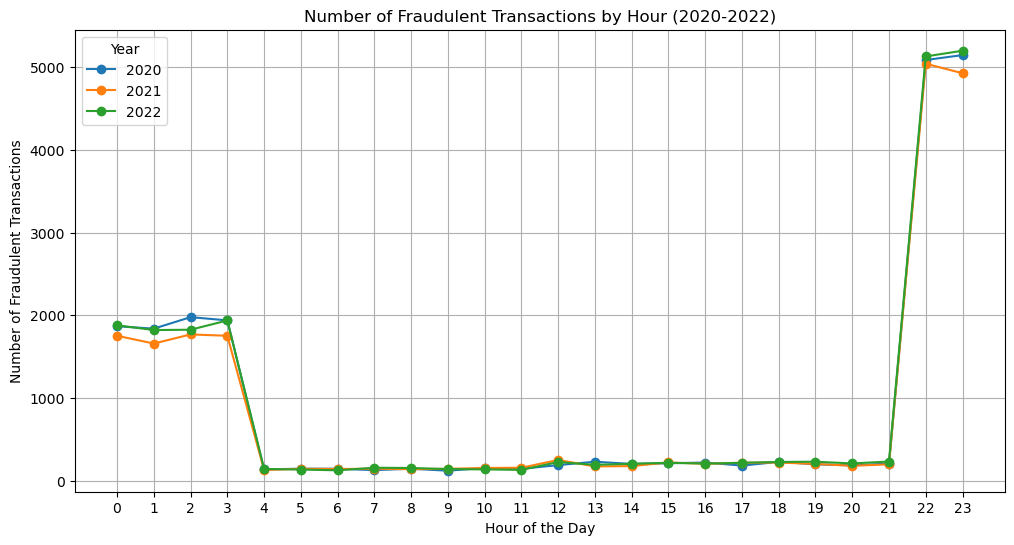

In [21]:
from pyspark.sql.functions import from_unixtime, year, hour, col
import matplotlib.pyplot as plt
import pandas as pd

traqnsaction = transactions_df.withColumn("trans_datetime", from_unixtime(col("trans_timestamp")))
fraud_data = traqnsaction.filter(col("is_fraud") == 1)
fraud_data = fraud_data.withColumn("trans_year", year("trans_datetime")) \
                   .withColumn("trans_hour", hour("trans_datetime"))
fraud_count_data = fraud_data.groupBy("trans_year", "trans_hour").count()
fraud_count_pd_df = fraud_count_data.toPandas()
dataframe_pivot = fraud_count_pd_df.pivot(index='trans_hour', columns='trans_year', values='count').fillna(0)

dataframe_pivot.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Number of Fraudulent Transactions by Hour (2020-2022)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(range(0, 24))  # Make sure all hours are shown on the x-axis
plt.grid(True)
plt.legend(title="Year")
plt.show()


### Part 3 RDDs vs DataFrame vs Spark SQL (25%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrame in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches.

#### Query: <strong>We consider city with population < 50K as small(denoted as S); 50K-200K as medium(M), >200K as large(L). For each city type, using customer age bucket of 10(e.g. 0-9, 10-19, 20-29…), show the percentage ratio of fraudulent transactions in each age bucket.</strong>

#### 3.1. RDD Implementation

In [22]:
from pyspark.sql import SparkSession
from datetime import datetime
import time


start_time = time.time()

customers_rdd = sc.sparkContext.textFile("customers.csv")
geolocation_rdd = sc.sparkContext.textFile("geolocation.csv")

header_customers = customers_rdd.first()
header_geolocation = geolocation_rdd.first()

customers_rdd = customers_rdd.filter(lambda row: row != header_customers).map(lambda row: row.split(','))
geolocation_rdd = geolocation_rdd.filter(lambda row: row != header_geolocation).map(lambda row: row.split(','))


In [29]:
def safe_parse_int(value):
    try:
        return int(value)
    except ValueError:
        print(f"ERROR - {value}")
        return None  

geolocation_rdd = geolocation_rdd.map(lambda row: row + [(
    'S' if safe_parse_int(row[6]) and safe_parse_int(row[6]) < 50000 
    else 'M' if safe_parse_int(row[6]) and 50000 <= safe_parse_int(row[6]) <= 200000 
    else 'L' if safe_parse_int(row[6]) and safe_parse_int(row[6]) > 200000 
    else None)])

geolocation_rdd = geolocation_rdd.filter(lambda row: row[-1] is not None)

customers_rdd = customers_rdd.filter(lambda row: safe_parse_int(row[7].split('-')[0]) is not None)
customers_rdd = customers_rdd.map(lambda row: row + [((current_year - int(row[7].split('-')[0])) // 10) * 10])

customer_geo_rdd = customers_rdd.map(lambda row: (row[9], row)).join(geolocation_rdd.map(lambda row: (row[5], row)))
customer_geo_rdd = customer_geo_rdd.map(lambda row: row[1][0] + row[1][1][1:])  


In [30]:
final_rdd = transactions_data_rdd.map(lambda row: (row[4], row)).join(customer_geo_rdd.map(lambda row: (row[0], row)))
final_rdd = final_rdd.map(lambda row: row[1][0] + row[1][1][1:])  
fraud_rdd = final_rdd.filter(lambda row: row[3] == '1')

grouped_rdd = fraud_rdd.map(lambda row: ((row[13], row[12]), 1)).reduceByKey(lambda a, b: a + b)

total_fraud_rdd = grouped_rdd.map(lambda row: (row[0][0], row[1])).reduceByKey(lambda a, b: a + b)

percentage_fraud_rdd = grouped_rdd.map(lambda row: (row[0][0], (row[0][1], row[1]))).join(total_fraud_rdd)
percentage_fraud_rdd = percentage_fraud_rdd.map(lambda row: (row[0], row[1][0][0], (row[1][0][1] / row[1][1]) * 100))

sorted_results = percentage_fraud_rdd.sortBy(lambda row: (row[0], row[1])).collect()

print("City Type\tAge Bucket\tFraud Percentage")
for result in sorted_results:
    print(f"{result[0]}\t\t{result[1]}\t\t{result[2]:.2f}")


City Type	Age Bucket	Fraud Percentage


In [31]:
end_time = time.time()
print(f"RDD Query Execution Time: {end_time - start_time} seconds")

RDD Query Execution Time: 1150.904633283615 seconds


#### 3.2. DataFrame Implementation

In [26]:
from pyspark.sql import functions as F
from datetime import datetime

start_time = time.time()
geo_loc_data = geolocation_df.withColumn(
    "city_type",
    F.when(F.col("population") < 50000, "S")  
    .when((F.col("population") >= 50000) & (F.col("population") <= 200000), "M")  
    .otherwise("L")  
)

year_curr = datetime.now().year
cust_data = customers_df.withColumn(
    "age_bucket",
    (F.floor((year_curr - F.year(F.col("dob"))) / 10) * 10).cast("int")
)


customer_geo_df = cust_data.join(
    geo_loc_data, cust_data.id_geolocation == geo_loc_data.id_geolocation
)

final_dataset = transactions_df.join(
    customer_geo_df, transactions_df.id_customer == customer_geo_df.id_customer
)

final_dataset = final_dataset.filter(F.col("is_fraud") == 1)
f_grouped_df = final_dataset.groupBy("city_type", "age_bucket").count()

grp_per_fraud = f_grouped_df.groupBy("city_type").agg(F.sum("count").alias("total_fraud"))
fraud_per_fraud = f_grouped_df.join(
    grp_per_fraud, on="city_type"
).withColumn(
    "fraud_percentage", (F.col("count") / F.col("total_fraud")) * 100
).orderBy("city_type", "age_bucket")  

fraud_per_fraud.select("city_type", "age_bucket", "fraud_percentage").show()
end_time = time.time()
print(f"DataFrame Query Execution Time: {end_time - start_time} seconds")

+---------+----------+------------------+
|city_type|age_bucket|  fraud_percentage|
+---------+----------+------------------+
|        L|        20| 7.911556400069096|
|        L|        30|17.147463580353545|
|        L|        40|19.047619047619047|
|        L|        50| 21.78269131110727|
|        L|        60|16.427707721540855|
|        L|        70| 8.372200149709219|
|        L|        80|  5.54499913629297|
|        L|        90|3.7657626533079984|
|        M|        20| 7.720159558146671|
|        M|        30|18.312365756366983|
|        M|        40|18.521018717397975|
|        M|        50| 20.23933722000614|
|        M|        60|16.133783369131635|
|        M|        70|10.303774163853943|
|        M|        80| 5.627493096041731|
|        M|        90| 3.142068119054925|
|        S|        20| 8.407914976926303|
|        S|        30|17.686337575164313|
|        S|        40|18.909942665361488|
|        S|        50|  21.5039854565795|
+---------+----------+------------

#### 3.3. Spark SQL Implementation

In [27]:
customers_df.createOrReplaceTempView("customers")
geolocation_df.createOrReplaceTempView("geolocation")
transactions_df.createOrReplaceTempView("transactions")

In [28]:
from datetime import datetime
start_time = time.time()
spark.sql("""
    CREATE OR REPLACE TEMP VIEW customer_geo AS
    SELECT
        cust.id_customer,
        cust.dob,
        go_loc.city,
        go_loc.state,
        go_loc.population,
        CASE
            WHEN go_loc.population < 50000 THEN 'S' 
            WHEN go_loc.population BETWEEN 50000 AND 200000 THEN 'M'  
            ELSE 'L'  
        END AS city_type
    FROM customers cust
    JOIN geolocation go_loc
    ON cust.id_geolocation = go_loc.id_geolocation
""")

current_year = datetime.now().year
spark.sql(f"""
    CREATE OR REPLACE TEMP VIEW customer_geo_age AS
    SELECT
        cust_geo.id_customer,
        cust_geo.city,
        cust_geo.state,
        cust_geo.city_type,
        FLOOR(({current_year} - YEAR(cust_geo.dob)) / 10) * 10 AS age_bucket
    FROM customer_geo cust_geo
""")

spark.sql("""
    CREATE OR REPLACE TEMP VIEW fraud_transactions AS
    SELECT
        trans.id_transaction,
        trans.amt,
        cust_geo.city_type,
        cust_geo.age_bucket
    FROM transactions trans
    JOIN customer_geo_age cust_geo
    ON trans.id_customer = cust_geo.id_customer
    WHERE trans.is_fraud = 1
""")

spark.sql("""
    CREATE OR REPLACE TEMP VIEW fraud_count_per_group AS
    SELECT
        city_type,
        age_bucket,
        COUNT(*) AS fraud_count
    FROM fraud_transactions
    GROUP BY city_type, age_bucket
""")

spark.sql("""
    CREATE OR REPLACE TEMP VIEW total_fraud_per_city_type AS
    SELECT
        city_type,
        SUM(fraud_count) AS total_fraud
    FROM fraud_count_per_group
    GROUP BY city_type
""")

final_result_df = spark.sql("""
    SELECT
        fraud_count.city_type,
        fraud_count.age_bucket,
        (fraud_count.fraud_count / total_fraud.total_fraud) * 100 AS fraud_percentage
    FROM fraud_count_per_group fraud_count
    JOIN total_fraud_per_city_type total_fraud
    ON fraud_count.city_type = total_fraud.city_type
    ORDER BY fraud_count.city_type, fraud_count.age_bucket  
""")
final_result_df.show()
end_time = time.time()
print(f"SparkSQL Query Execution Time: {end_time - start_time} seconds")

+---------+----------+------------------+
|city_type|age_bucket|  fraud_percentage|
+---------+----------+------------------+
|        L|        20| 7.911556400069096|
|        L|        30|17.147463580353545|
|        L|        40|19.047619047619047|
|        L|        50| 21.78269131110727|
|        L|        60|16.427707721540855|
|        L|        70| 8.372200149709219|
|        L|        80|  5.54499913629297|
|        L|        90|3.7657626533079984|
|        M|        20| 7.720159558146671|
|        M|        30|18.312365756366983|
|        M|        40|18.521018717397975|
|        M|        50| 20.23933722000614|
|        M|        60|16.133783369131635|
|        M|        70|10.303774163853943|
|        M|        80| 5.627493096041731|
|        M|        90| 3.142068119054925|
|        S|        20| 8.407914976926303|
|        S|        30|17.686337575164313|
|        S|        40|18.909942665361488|
|        S|        50|  21.5039854565795|
+---------+----------+------------

### 3.4 Which one is the easiest to implement in your opinion? Log the time taken for each query, and observe the query execution time, among RDD, DataFrame, SparkSQL, which is the fastest and why? Please include proper reference. (Maximum 500 words.)

In my view, SparkSQL is the easiest to work with compared to RDDs and DataFrames. The reason is that SparkSQL lets you write queries in a straightforward, SQL-like format, which feels more natural and less complicated. You don’t have to worry about the intricate details of transformations and actions that you deal with in RDDs or even DataFrames. If you’re already familiar with SQL, picking up SparkSQL is a breeze, making it a quicker and more efficient option to implement.

<b>RDD:</b>

RDD took the most time as it operates at a lower level in spark, and which lacks the optimization provided by the spark.

<b>Dataframe:</b>

It performed much better than RDD. They are actually build over the RDDs dataframes, so they come up with inbuild optimizations  
<b>SparkSQL:</b>

It was kindoff the fastest among them, it is because it benifits from the same optimizers as the dataframes. Basically, the execution plan generated by the SPARKSQL is more efficient  which enhances the performance of the code. 

### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html